## Media Company Case Study

- Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

## Potential Causes

- 1 .less number of peoples coming to the flatform
- 2. less number of peoples watching the watching the video
- 3. Decline in marketing spend
- 4. Competitive shows e.g.IPL,cricket
- 5. special holidays 
- 6.twist in the story e.g.if any special character goes out of the show that will create a decline or casting of characters has changed


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv('mediacompany.csv')
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [2]:
df=df.drop(['Unnamed: 7'],axis=1)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [3]:
# Change the type of date column into timestamp

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [4]:
# Deriving "days since the show started"

from datetime import date
d0=d0 = date(2017,2,28)
d0=pd.to_datetime(d0)

d1=df['Date']
delta=d1-d0
df['day']=delta
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [5]:
df['day']=df['day'].astype(str)
df['day']=df['day'].map(lambda x:x[0:2])
df['day']=df['day'].astype(int)

df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='day'>

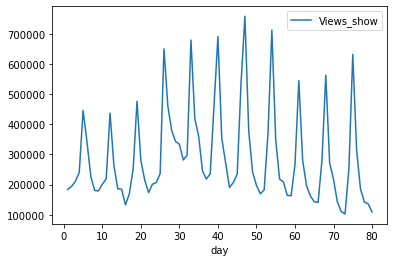

In [6]:
# days vs Views_show

df.plot.line(x='day', y='Views_show')

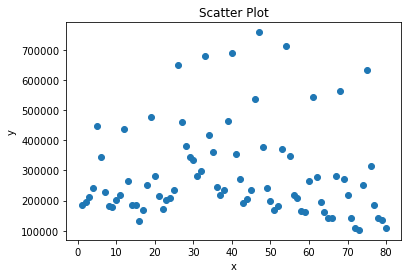

In [7]:
## Scatter plot

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.scatter(x='day',y='Views_show',data=df)

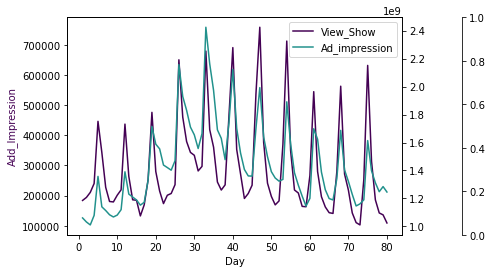

In [8]:
fig,axes=plt.subplots(1,1)

part1=axes.twinx()
part2=axes.twinx()

axes.set_xlabel('Day')
axes.set_ylabel('View_Show')
axes.set_ylabel('Add_Impression')

color1=plt.cm.viridis(0)
color2=plt.cm.viridis(0.5)
color3=plt.cm.viridis(0.9)

p1, = axes.plot(df.day,df.Views_show, color=color1,label="View_Show")
p2, = part1.plot(df.day,df.Ad_impression,color=color2, label="Ad_impression")

lns=[p1,p2]
axes.legend(handles=lns,loc='best')

## right, left, top, bottom

part2.spines['right'].set_position(('outward',60))

axes.yaxis.label.set_color(p1.get_color())
part1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')


In [9]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable

df['weekday']=(df['day']+3)%7
df['weekday'].replace(0,7,inplace=True)
df['weekday']=df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [10]:
x=df.corr()
x

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
Views_show,1.000000,0.535290,0.604279,0.785673,-0.083154,0.402533,-0.038521,-0.568976
Visitors,0.535290,1.000000,0.935832,0.478598,0.147210,0.223093,0.738599,-0.259023
Views_platform,0.604279,0.935832,1.000000,0.587003,0.036575,0.452375,0.641677,-0.246223
Ad_impression,0.785673,0.478598,0.587003,1.000000,-0.163936,0.644354,0.064498,-0.514240
Cricket_match_india,-0.083154,0.147210,0.036575,-0.163936,1.000000,-0.258199,0.395155,0.056886
Character_A,0.402533,0.223093,0.452375,0.644354,-0.258199,1.000000,-0.033544,-0.014688
day,-0.038521,0.738599,0.641677,0.064498,0.395155,-0.033544,1.000000,-0.009991
weekday,-0.568976,-0.259023,-0.246223,-0.514240,0.056886,-0.014688,-0.009991,1.000000


<AxesSubplot:>

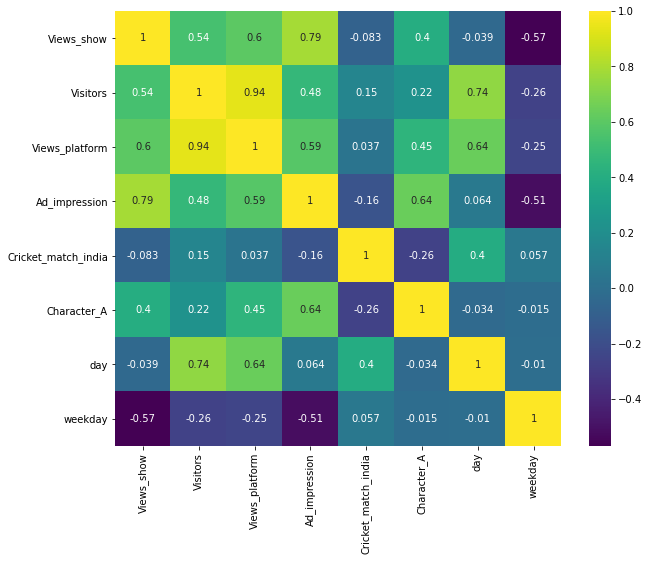

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(x,annot=True,cmap='viridis')

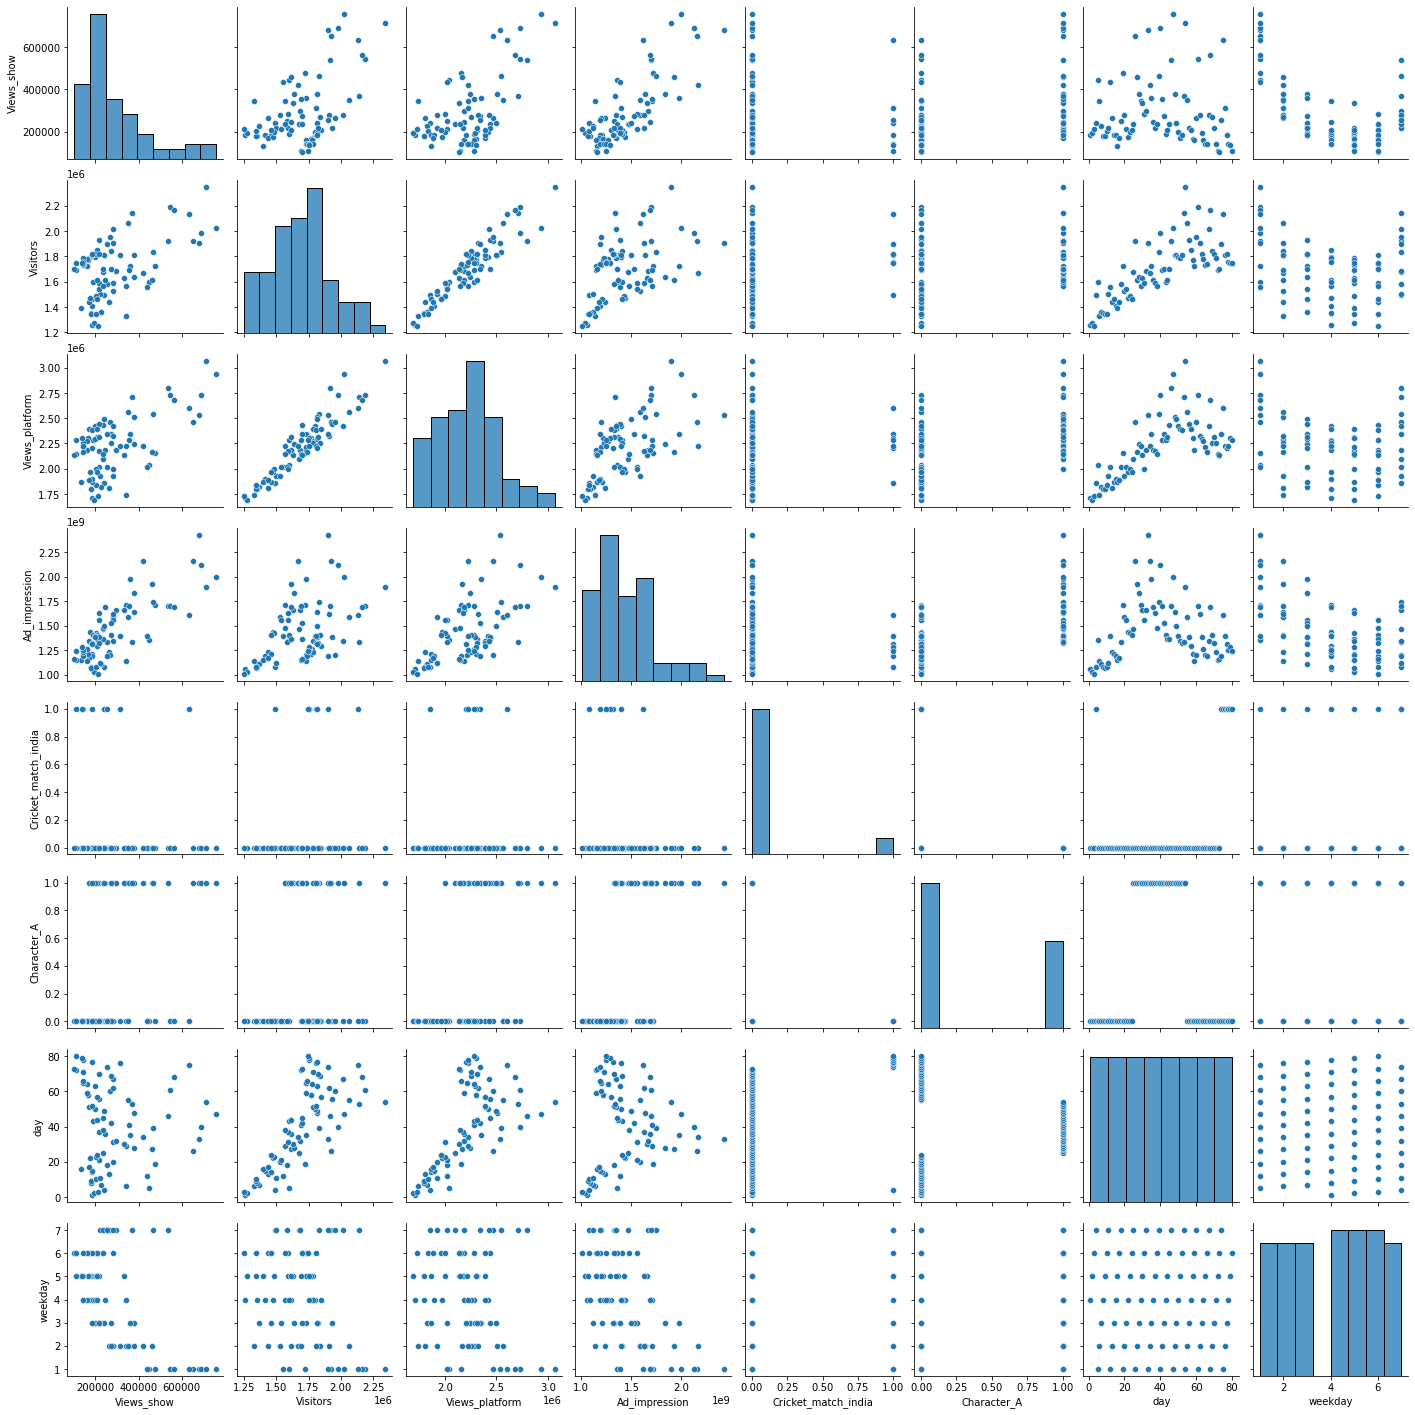

In [12]:
sns.pairplot(df)

In [13]:
X=df.drop(['Views_show','Date','day'],axis=1)
y=df['Views_show']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [16]:
X_train.head()

,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday
57,1772449,2303380,1216537437,0,0,5
35,1615949,2184161,1690425253,0,1,4
51,1810697,2387054,1323744093,0,1,6
21,1474098,1967000,1439043318,0,0,4
32,1902556,2535991,2424202948,0,1,1


In [17]:
y_train.head()

57    164043
35    244916
51    182208
21    173280
32    679522
Name: Views_show, dtype: int64

In [18]:
# Creating linear regression model as lm as object
lm=LinearRegression()

In [19]:
model=lm.fit(X_train,y_train)
model

LinearRegression()

In [20]:
model.coef_

array([ 2.51107776e-01, -1.05492948e-01,  2.42416354e-04, -3.96861575e+04,
       -2.19472977e+03, -1.62967575e+04])

In [21]:
model.intercept_

-194894.757721717

In [22]:
from sklearn.feature_selection import RFE

In [23]:
rfe=RFE(lm,n_features_to_select=5)

In [24]:
rfe=rfe.fit(X_train,y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Visitors', True, 1),
 ('Views_platform', True, 1),
 ('Ad_impression', False, 2),
 ('Cricket_match_india', True, 1),
 ('Character_A', True, 1),
 ('weekday', True, 1)]

In [26]:
col=X_train.columns[rfe.support_]

In [27]:
print(col)

Index(['Visitors', 'Views_platform', 'Cricket_match_india', 'Character_A',
       'weekday'],
      dtype='object')


In [28]:
print(X_train.columns[~rfe.support_])

Index(['Ad_impression'], dtype='object')


In [29]:
X_train_rfe=X_train[col]

In [30]:
import statsmodels.api as sm

In [31]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [32]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     16.10
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.95e-09
Time:                        16:37:10   Log-Likelihood:                -713.24
No. Observations:                  56   AIC:                             1438.
Df Residuals:                      50   BIC:                             1451.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.64e+05    1.3e+05      1.266      0.211   -9.61e+04    4.24e+05
Visitors                0.4712      0.221      2.136      0.038       0.028       0.914
Views_platform         -0.2593      0.200     -1.295      0.201      -0.661       0.143
Cricket_match_india -4.705e+04   3.77e+04     -1.247      0.218   -1.23e+05    2.87e+04
Character_A          9.714e+04   3.53e+04      2.750      0.008    2.62e+04    1.68e+05
weekday             -3.585e+04   6722.226     -5.333      0.000   -4.94e+04   -2.23e+04
==============================================================================
Omnibus:                        2.124   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                2.070
Skew:                           0.419   Prob(JB):                        0.355
Kurtosis:                       2.568   Cond. No.                     3.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,124.01
2,Views_platform,23.41
1,Visitors,20.01
4,Character_A,2.07
5,weekday,1.23
3,Cricket_match_india,1.15


## Running first model (lm1) Weekday & visitors

In [36]:
# Putting feature variable to x
X = df[['Visitors','weekday']]

# Putting response variable to y
y=df['Views_show']

In [37]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X=sm.add_constant(X)

# create a fitted model in one line

lm_1=sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           8.01e-12
Time:                        16:37:11   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [38]:
# Create a weekend variable with value 1 at weekend and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

df['weekend']=[cond(i) for i in df['day']]

df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [39]:
# Putting Feature variables to X
X=df[['Visitors','weekend']]

# Putting response variable to y
y=df['Views_show']

In [40]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_2=sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           2.51e-12
Time:                        16:37:12   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

## Running third model (lm3) visitors, weekend & Character_A

In [41]:
#character_A =1 (character is present in the show)
#character_A =0 (character is absent in the show)
#first few weeks character was absent in the show and then it appears in the middle but then it is absent

In [42]:
#  Putting Feature variables to X
X = df[['Visitors','weekend','Character_A']]

# Putting feature variables in y
y = df['Views_show']

In [43]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_3=sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.53e-14
Time:                        16:37:12   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [44]:
# Do the lag views of yesterday affect todays view ??
# if yesterdays content was good enough to watch then the viwer will come back today also that will affect the viwership
#so we will create a new column called 

In [45]:
# Create lag variable
df['Lag_Views'] = np.roll(df['Views_show'], 1)
df.Lag_Views.replace(108961,0, inplace=True)

In [46]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [47]:
# Putting feature variables to X
X=df[['Visitors','Character_A','Lag_Views','weekend']]

# Putting feature variable to y
y=df['Views_show']
      

In [48]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_4=sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           3.16e-21
Time:                        16:37:13   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<AxesSubplot:>

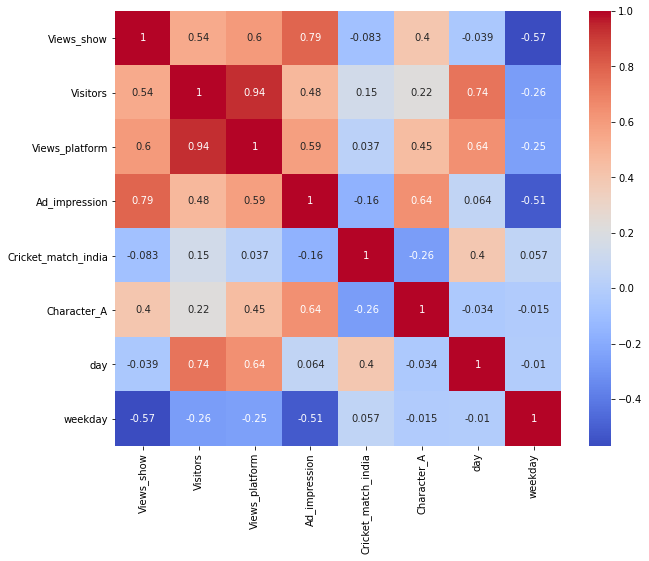

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(x,annot=True,cmap='coolwarm')

## Running fifth model (lm5) Character_A, weekend & Views_platform

In [50]:
# Putting feature variable to X
X = df[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = df['Views_show']

In [51]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_5=sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           3.59e-15
Time:                        16:37:18   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## Running sixth model (lm6) Character_A, weekend & Visitors


In [52]:
# Putting feature variable to X
X = df[['weekend','Character_A','Visitors']]

# Putting response variable to y
y =df['Views_show']

In [53]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_6=sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.53e-14
Time:                        16:37:19   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

## Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [54]:
# Putting feature variable to X
X = df[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = df['Views_show']

In [55]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_7=sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.10e-25
Time:                        16:37:19   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

## Running eight model (lm8) Character_A, weekend & Ad_impressions

In [56]:
# Putting feature variable to X
X = df[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = df['Views_show']

In [57]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_8=sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.05e-26
Time:                        16:37:20   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [58]:
#Ad impression in million
df['ad_impression_million'] = df['Ad_impression']/1000000

#### Running seventh model (lm7) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [59]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = df['Views_show']

In [60]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_9=sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.02e-25
Time:                        16:37:20   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

### Running seventh model (lm7) Character_A, weekend & ad_impressions_million

In [61]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [62]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_10=sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.05e-26
Time:                        16:37:21   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

## Making predictions using lm10

In [64]:
## Making predictions using the model

X = df[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views=lm_10.predict(X)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(df['Views_show'],Predicted_views)
r_squared=r2_score(df['Views_show'],Predicted_views)


print('Mean Squared Error:', mse)
print('R_squared Error:',r_squared)

Mean Squared Error: 4677651616.2534075
R_squared Error: 0.802643446857565


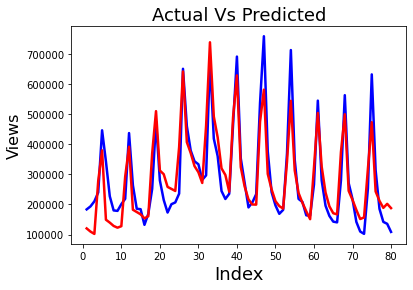

In [69]:
### Actual Vs Predicted

c=[i for i in range(1,81,1)]
fig=plt.figure()
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)
plt.title('Actual Vs Predicted',fontsize=18)
plt.plot(c,df['Views_show'],color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,Predicted_views,color='red',linewidth=2.5,linestyle='-')

Text(0, 0.5, 'Views_show-Predicted_views')

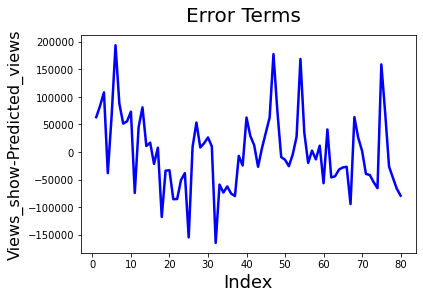

In [70]:
### Error Terms

c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

## Making predictions using lm6

In [71]:
# Making prediction using the model
X = df[['weekend','Character_A','Visitors']]
X=sm.add_constant(X)
Predicted_views=lm_6.predict(X)

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(df['Views_show'],Predicted_views)
r_squared=r2_score(df['Views_show'],Predicted_views)


print('Mean Squared Error:', mse)
print('R_squared Error:',r_squared)

Mean Squared Error: 9815432480.451523
R_squared Error: 0.585873408097934


Text(0, 0.5, 'Views')

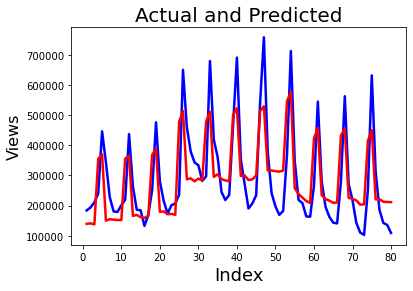

In [73]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)  

Text(0, 0.5, 'Views_show-Predicted_views')

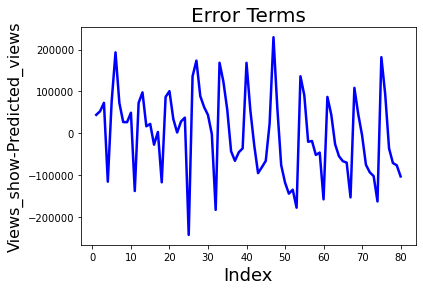

In [74]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label